# Part -A
## Problem statement

A chit fund has 25 members. Each month they contribute Rs 2000 each. End of the month, the
person who bids the lowest for the corpus, gets his bid. The group organizer gets paid a fixed
commission of Rs 2500 each month (5% of 25*2000).It is deducted from the bid winner's
corpus. The remaining amount is distributed among all the 25 customers equally.Enclosed
excel has the table with cashflows for each month.

Task :

* What is the Annualized Return of the person who bids in the last month ?
* What is the Annualized Return of the person who bids in the first month ?
* Write an R/Python script which calculates the annualized return of chit fund participant ?

Show the Return % for each month's bid winner.



Let's suppose :

**Number of members = 25**

**Rs to be contributed by each person = 2000**

**Amount collected each month = amount contributed * number of menbers =  25*2000 = 50,000**

The commision is always deducted from the amount given to the bid winner

Let's suppose first **bid's winner won = Rs 40,000** from which **organizer's commission= Rs 2500**

**Amount bid's winner gets = Amount won - organizer's commission = 40,000-2,500 = Rs 37.500**

The ammount left is considered as devident(profit) and that amount is distributed among each member in the next month.

**Amount distributed between each member (devident)= (Total collected amount - Won ammont) / Number of members =  (50,000-40,000)/25 = Rs 400**

This means in the next month whoever wins will get his win ammont as well as the profit of the last month

This means 
**Total amount recived to the winner of that month = Amount bid's winner gets + chit profit**


**The winner is not allowed to bid again , but has to continue to pay monthly**

Memebers are invited every month for 25(number of members) consicutive months and the chit ammount is given to the lowest bidder till every bidder gets the chit ammount once


In [67]:
import pandas as pd

df = pd.read_excel('Exercise Data.xlsx', index_col=False)
df.columns = df.iloc[0]

df.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
0,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
1,1,2000,40000,2500,37500,400
2,2,2000,42000,2500,39500,320
3,3,2000,45000,2500,42500,200
4,4,2000,48000,2500,45500,80


In [68]:
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
0,1,2000,40000,2500,37500,400
1,2,2000,42000,2500,39500,320
2,3,2000,45000,2500,42500,200
3,4,2000,48000,2500,45500,80
4,5,2000,40000,2500,37500,400


In [69]:
list=[]
col = df['Amount returned to everyone in the group']
col

sum = 0
list.append(0)
for num in col:
    sum =  sum + int(num)
    list.append(sum)

new_list = list[:25]
new_list

[0,
 400,
 720,
 920,
 1000,
 1400,
 1720,
 2000,
 2240,
 2640,
 2960,
 3160,
 3240,
 3640,
 3960,
 4240,
 4520,
 4880,
 5200,
 5400,
 5600,
 5840,
 6000,
 6120,
 6200]

In [70]:
#creating a new column with the profit of previous months
df['profit of previous months']=new_list

# Amount returned to everyone in the group at the end of the commitee
df['Total_anualized_devident'] = df['Amount returned to everyone in the group'].sum()

df.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,profit of previous months,Total_anualized_devident
0,1,2000,40000,2500,37500,400,0,6200
1,2,2000,42000,2500,39500,320,400,6200
2,3,2000,45000,2500,42500,200,720,6200
3,4,2000,48000,2500,45500,80,920,6200
4,5,2000,40000,2500,37500,400,1000,6200


In [76]:
# Total ammount recived by bid winner till that month will be the winning ammount of this month and profits of all the previous months
df['Total amount returned to Bid Winner'] = df.apply(lambda x: x['Net amount recd by Bid winner'] + x['profit of previous months'], axis=1)

# Total anualized Return = Net amount recived by the bidder + Total_anaualized_devident
df['Total anualized Return'] = df['Net amount recd by Bid winner'] + df['Total_anualized_devident']

In [91]:
# percentage of the returned amount to the bid winner is
df["Return % for each month's bid winner"] = (df['Total anualized Return']/50000)*100
df.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,profit of previous months,Total_anualized_devident,Total amount returned to Bid Winner,Return % for each month's bid winner,Total anualized Return
0,1,2000,40000,2500,37500,400,0,6200,37500,87.4,43700
1,2,2000,42000,2500,39500,320,400,6200,39900,91.4,45700
2,3,2000,45000,2500,42500,200,720,6200,43220,97.4,48700
3,4,2000,48000,2500,45500,80,920,6200,46420,103.4,51700
4,5,2000,40000,2500,37500,400,1000,6200,38500,87.4,43700


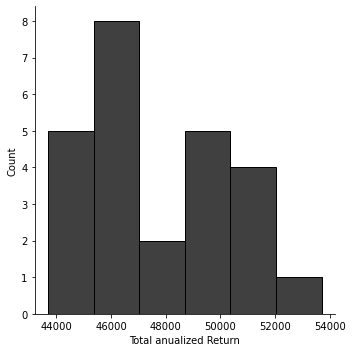

In [94]:
import seaborn as sns
sns.displot(df["Total anualized Return"],color='black')

This plot means maximum people got the peturn amount of 46000

### What is the Annualized Return of the person who bids in the last month ?

Total amount contributed in 25 months = 50,000 

Money Returns= 53700rs 
i.e 107.40%

In [81]:
# Anual amount returned
df['Total anualized Return'][24]

53700

In [82]:
# Return % for each month's bid winner  
df["Return % for each month's bid winner"][24]

107.4

### What is the Annualized Return of the person who bids in the first month ?

Total amount contributed in 25 months = 50,000

Money Returns= 43700rs  i.e 87.40%

In [86]:
#Anual amount returned
df['Total anualized Return'][0]

43700

In [87]:
# Return % for each month's bid winner
df["Return % for each month's bid winner"][0]

87.4

### Write an R/Python script which calculates the annualized return of chit fund participant ?
**Calculates the annualized return of chit fund participant**

In [88]:
# Total anualized Return = Net amount recived by the bidder + Total_anaualized_devident
df['Total anualized Return'] = df['Net amount recd by Bid winner'] + df['Total_anualized_devident']

### Return % for each month's bid winner.

In [90]:
df["Return % for each month's bid winner"] = (df['Total anualized Return']/50000)*100
df["Return % for each month's bid winner"]

0      87.4
1      91.4
2      97.4
3     103.4
4      87.4
5      91.4
6      93.4
7      95.4
8      87.4
9      91.4
10     97.4
11    103.4
12     87.4
13     91.4
14     93.4
15     93.4
16     89.4
17     91.4
18     97.4
19     97.4
20     95.4
21     99.4
22    101.4
23    103.4
24    107.4
Name: Return % for each month's bid winner, dtype: object